<a href="https://colab.research.google.com/github/Harisuryatm/Time-Series-Modeling/blob/master/Induvidual_Household's_Electric_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Individual household electric power consumption:**      
The dataset contains each household's electric power consumption in the entire area which consist of 2075259 records (houses) located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).    

The task is to predict the electricity power consumption for unknown houses in that area with respect to the measurement we had.     

Though ,this is Supervised Learning problem as the dataset consist of target value also and this is the regression problem as the prediction is of power consumption ie.continuous value.


### **Objective:**          
  The Induvidual household's Electric power comsumption dataset has taken up as a complete 4 years record. So, this dataset consist of time series problem in which all the readings (features) were recorded with respect to time. This problem will differ from all other ML techniques like normal regression , classification problems that predicts Cat with respect to images. 

REASON:     
For example , the classifying cats with respect to images leads to be the features that corresponds same pattern which we saw earlier before 2yrs ,now, after ten years etc.. We can store the parameters which gives best predictions ,then evaluate it with new set of images.        But in time series is to retrain your model every time you get new data. Note that this is not the same as continuous learning, where an already trained model is updated as new data comes in. You are actually retraining a new model from scratch everytime you want to generate a new forecast

## Importing Libraries:

In [0]:
import pandas as pd                             # Data Analysis
import numpy as np                              # Matrix manipulation
import matplotlib.pyplot as plt                 # Data Visualization
import seaborn as sns                           # Data Visualization

## Uploading dataset to Colab from Drive:

In [100]:
#Uploading file from google drive in this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
'content/drive/My Drive/Colab Notebooks'

'content/drive/My Drive/Colab Notebooks'

In [102]:
from zipfile import ZipFile
file_name = '/content/drive/My Drive/Colab Notebooks/household_power_consumption.zip'
with ZipFile(file_name , 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Getting Data:

In [141]:
import pandas as pd
data = pd.read_csv('/content/household_power_consumption.txt',sep = ";", parse_dates={'DateTime' : ['Date', 'Time']}, infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#first ten rows
data.head(10)

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


The data description:     
global_active_power: The total active power consumed by the household (kilowatts).             
global_reactive_power: The total reactive power consumed by the household (kilowatts).                    
voltage: Average voltage (volts).                 
global_intensity: Average current intensity (amps).                   
sub_metering_1: Active energy for kitchen (watt-hours of active energy).         
sub_metering_2: Active energy for laundry (watt-hours of active energy).             
sub_metering_3: Active energy for climate control systems (watt-hours of active energy).                


In [0]:
#size of the dataset
data.shape

(2075259, 8)

In [0]:
print('There are {} total records of house measurements and {} total different measurements in the entire area'.format(data.shape[0],data.shape[1]))

There are 2075259 total records of house measurements and 8 total different measurements in the entire area


In [0]:
#Visualizing each feature's datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
DateTime                 datetime64[ns]
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [0]:
data.isnull().sum()

DateTime                     0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

**Data Cleaning:**

#### Problem 1:
Dataset contains all features of type Object . The object datatype can't be modeled with most of the machine learning algorithms.But while infering dataset,instead date and time feature ,all other features corresponds to float value.


#### Probem 2:
In our Energy consumption dataset, Sub_metering_3 (ie,.electric water-heater and an air-conditioner) has 25979 missing / null values.

In [0]:
#If each rows of corrrespondong feature is '?' then return true , else false
all(data.loc[(data['Sub_metering_3'].isnull()) & (data['Global_active_power'] == '?') & (data['Global_reactive_power'] == '?') & 
             (data['Voltage'] == '?') & (data['Global_intensity'] == '?') & (data['Sub_metering_1'] == '?') & (data['Sub_metering_2'] == '?')])

True

There are no records of any features when Sub_metering_3 rows contains null values in it. which says that all the rows contains '?'.(True) - all measurements were missing in that dates.

In [0]:
# Replacing all the unwamted characters in the features to NaN values for our convinience
data.replace('?', np.NaN , inplace = True)

In [0]:
#Now by checking the missing values , we found that all the 25979 records /measurements were missing in the data
data.isnull().sum()

DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [0]:
#Changing the datatype of the features to work on missing values
cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
for col in cols:
  data[col] = data[col].astype(float)


Now we have changed the datatype of the respective features. Problem 1 is solved!!!

In [0]:
# Datatype has been changed to float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
DateTime                 datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [0]:
#Imputing mean values of each features in the null rows
for col in cols:
  data[col].fillna(data[col].mean(),inplace = True)

In [0]:
# Checked : The missing value problem is solved
data.isnull().sum()

DateTime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Now, we solved the missing values constrains. problem 2 is cleared!!

##  feature Engineering:      
energy_consumed_per_min = (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)   


In [0]:
data['energy_consumed_per_minute'] = (data['Global_active_power'] * 1000 / 60) - (data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3'])

Done ,
- Set objective
- Creating platform
- Getting data
- Exploring with missing values , categorical values

### Exploratory Data Analysis:           
 In this, we are going to gain information about the data by analysing it.

In [0]:
data.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_per_minute
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [0]:
#Description of the dataset that contains min,max,median,mean,percentile values to check whether the dataset has any outliers in it
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_per_minute
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,9.525726e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


The description about our dataset shows that , 
Sub_metering_1 , Sub_metering_2 , Sub_metering_3 features has many readings of zero values in the dataset.       

**Graphical Analysis:**

Dataset has electric power consumption per minute range from Dec 2006 to Nov 2010. So each day of 1440 records (24 hours * 60 minutes). For time series analysis , by using certain visualization techniques in pandas can visualize quarterly, yearly, monthly, weekly, hourly, minutes... seperately. This can show us how the data spread accross in seperate time frame.

1. When is electricity consumption typically highest and lowest?
2. What are the long-term trends in electricity consumption?

**Subsample the data from the dates 2009-02-01(Feb 1) and 2009-02-02(Feb 7):**

This one week sample is for better visualization

In [0]:
sample_data = data[(data['DateTime'] >= '2009-02-01') & (data['DateTime'] <= '2009-02-07')]

In [0]:
#Total records for a week (random measurements)
len(data[(data['DateTime'] >= '2009-02-01') & (data['DateTime'] <= '2009-02-07')])

8641

In [0]:
#Sub_indexing dateTime  column
sample_data = sample_data.set_index('DateTime')
sample_data.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_per_minute
DateTime,,,,,,,,
2009-02-01 00:00:00,3.122,0.120,240.90,12.8,0.0,0.0,18.0,34.033333
2009-02-01 00:01:00,3.428,0.122,239.91,14.8,0.0,0.0,17.0,40.133333
2009-02-01 00:02:00,5.848,0.106,237.41,24.6,0.0,0.0,18.0,79.466667


**Energy consumed per minute plot:**

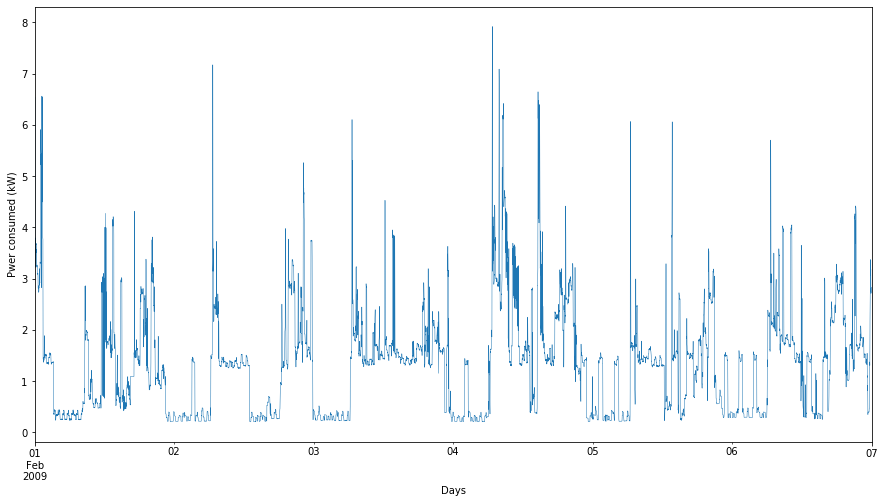

In [0]:
plt.figure(figsize = (15,8))
sample_data['Global_active_power'].plot(linewidth=0.5)
plt.xlabel('Days')
plt.ylabel('Pwer consumed (kW)')
plt.show()

Power consumption is increased  in morning time from 8 am - 9am and its used moderately on the weekdays
There is a high peak in the power consumption from 5pm - 10pm and it gets reduced on the weekdays

**Global active power vs frequency of use:**

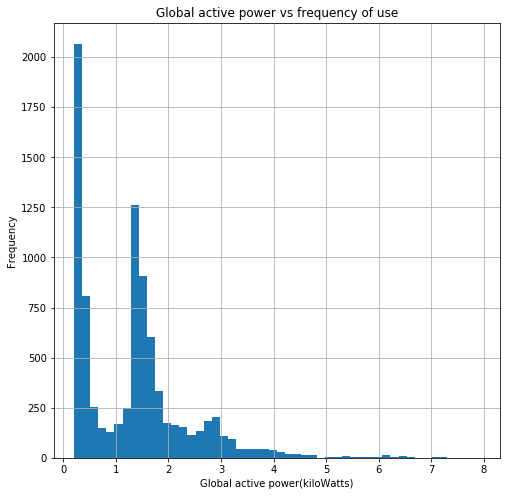

In [0]:
sample_data['Global_active_power'].hist(bins = 50,figsize = (8,8))
plt.title('Global active power vs frequency of use')
plt.xlabel('Global active power(kiloWatts)')
plt.ylabel('Frequency')
plt.show()

From this plot ,         
 we can see that large number of observation for 0 to 500 watts,       
fewer observaltion between 500 to 1 KiloWatts,        
gradually decreasing num of observation of over  KiloWatts              

**Energy sub-meterings over time:**

sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

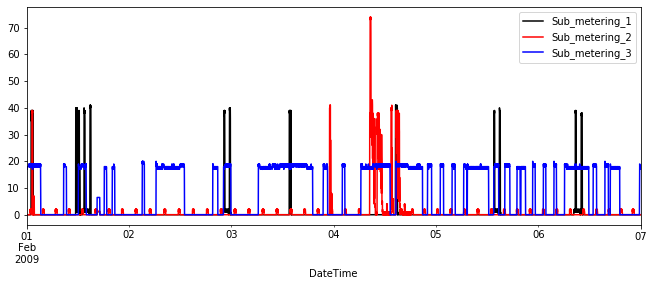

In [0]:
plt.figure(figsize = (11,4))
sample_data.Sub_metering_1.resample('T').mean().plot(color='black', legend=True)
sample_data.Sub_metering_2.resample('T').mean().plot(color='r', legend=True)
sample_data.Sub_metering_3.resample('T').mean().plot(color='b', legend=True)
plt.show()

Feb 1,2009 - Sunday
Here, we can see that kitchen electricity usage is pretty low on Tuesday(05) with higher usage on Suunday evening, Tuesday Mornings, and Friday evening. By contrast, people seem to use their laundry rooms on Wednwsday morning and on Thursday around noon. Electric water heating and air-conditioning appear to have used frequently.

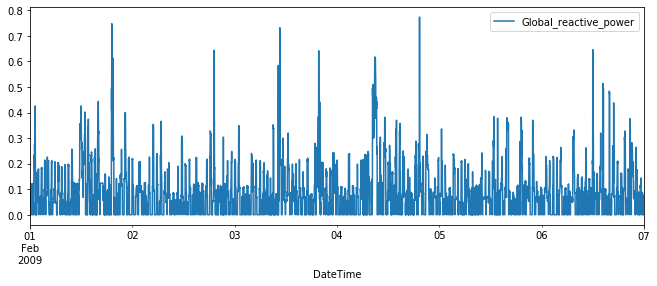

In [0]:
# For Global_reactive power
plt.figure(figsize = (11,4))
sample_data.Global_reactive_power.resample('T').mean().plot(legend=True)
plt.show()

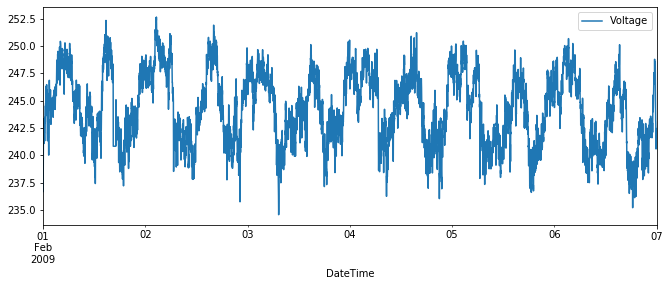

In [0]:
# For Voltage
plt.figure(figsize = (11,4))
sample_data.Voltage.resample('T').mean().plot(legend=True)
plt.show()

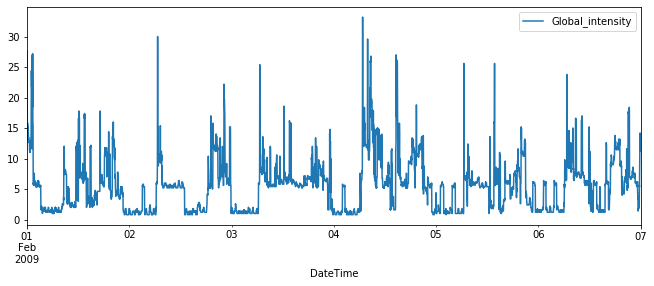

In [0]:
# For global intensity
plt.figure(figsize = (11,4))
sample_data.Global_intensity.resample('T').mean().plot(legend=True)
plt.show()

**EDA with complete Data:**

In [0]:
# This code changes Date column to the index that will be convinent for the time series plots.
full_data = data.set_index('DateTime')
full_data.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_per_minute
DateTime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


**Electric power consumed each year (2006-2010):**

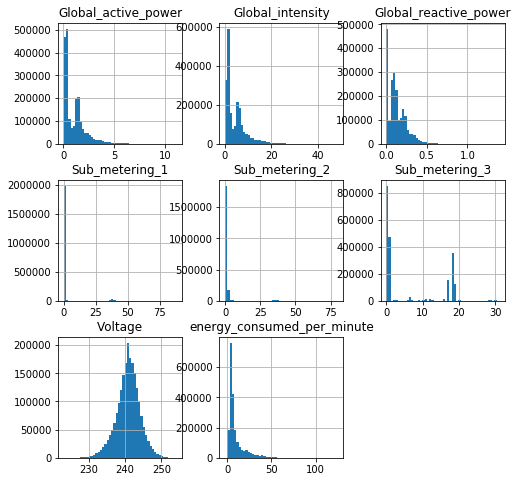

In [0]:
# Exploring the distribution of the data
full_data.hist(bins = 50 , figsize = (8,8))
plt.show()

We can see that active and reactive power, intensity, as well as the sub-metered power are all skewed distributions down towards small watt-hour.     
Voltage feature is Normally distributed.

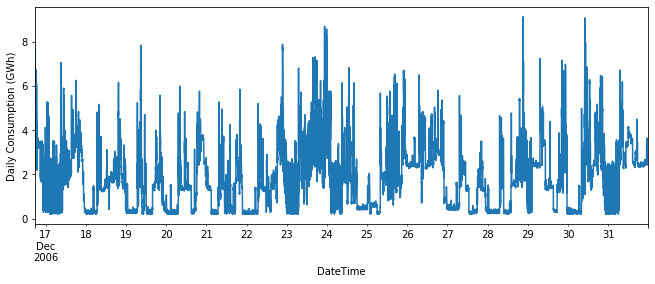

In [0]:
plt.figure(figsize=(11,4))
ax = full_data.loc['2006', 'Global_active_power'].plot()
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

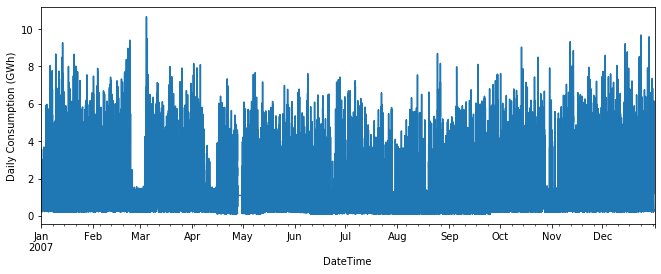

In [0]:
plt.figure(figsize=(11,4))
ax = full_data.loc['2007', 'Global_active_power'].plot()
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

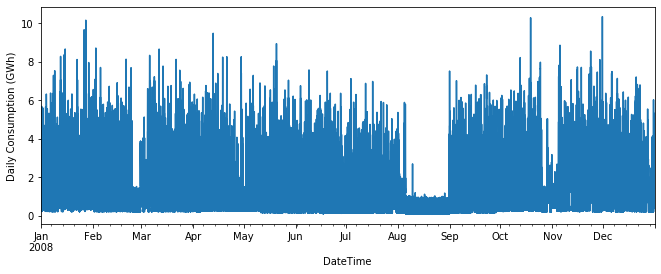

In [0]:
plt.figure(figsize=(11,4))
ax = full_data.loc['2008', 'Global_active_power'].plot()
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

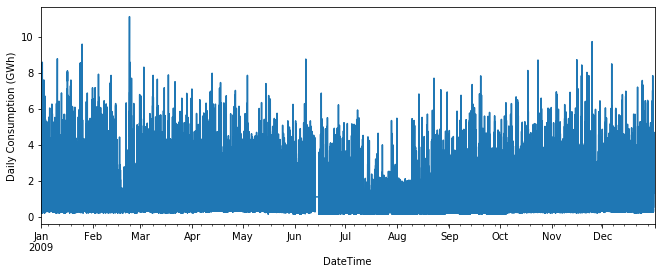

In [0]:
plt.figure(figsize=(11,4))
ax = full_data.loc['2009', 'Global_active_power'].plot()
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

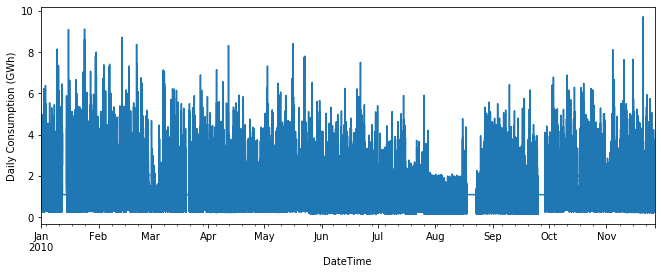

In [0]:
plt.figure(figsize=(11,4))
ax = full_data.loc['2010', 'Global_active_power'].plot()
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

This shows that , 
- Mostly energy is consumed in the year 2007.
- There is power consumption decline in the month of Feb - March  and Aug - september.       
- Also , there is a downward trend in the Months of June - September (ie,.Summer) and peak in the months of November - Febraury (winter season)

###### **Resampling global_active power quarterly summary:** (4 years once)

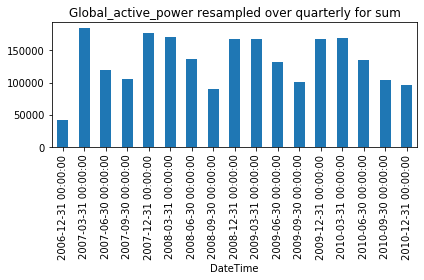

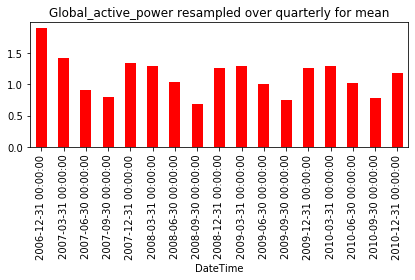

In [0]:
full_data['Global_active_power'].resample('Q').sum().plot(kind = 'bar',title='Global_active_power resampled over quarterly for sum') 
plt.tight_layout()
plt.show()   

full_data['Global_active_power'].resample('Q').mean().plot(kind = 'bar',title='Global_active_power resampled over quarterly for mean', color='red') 
plt.tight_layout()
plt.show()

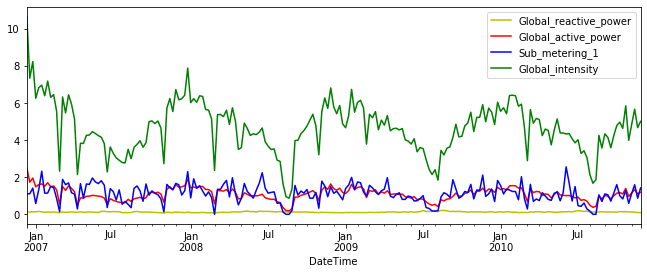

In [0]:
# Resampling and visualizing mean weekly statistics
plt.figure(figsize = (11,4))
full_data.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
full_data.Global_active_power.resample('W').mean().plot(color='r', legend=True)
full_data.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
full_data.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

**Comparison of samples over day:**

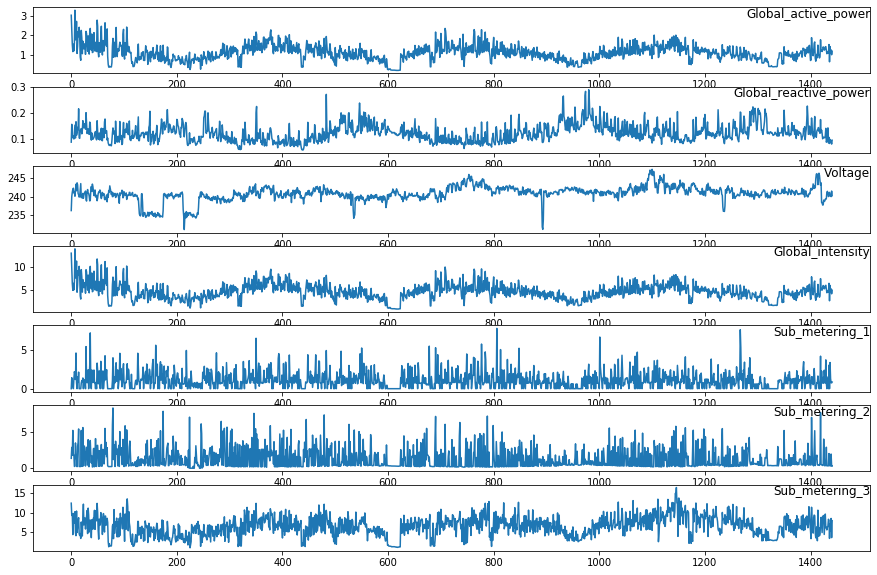

In [0]:
# Below I compare the mean of different featuresresampled over day. 
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = full_data.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(full_data.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

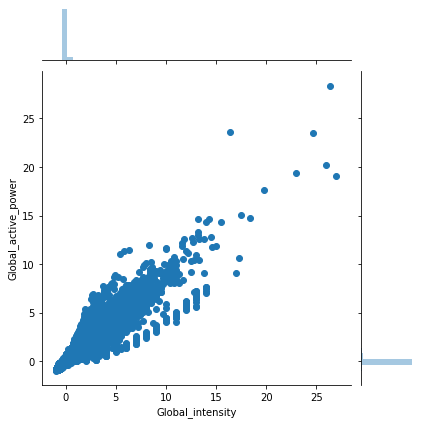

In [0]:
## The correlations between 'Global_intensity', 'Global_active_power'
dt = full_data.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=dt)  

plt.show()

Global active power and intensity were highly correlated

Done,
- Exploratory Data Analysis,       
- Graphical Reporesentation,        


**Machine Learning Model:**

In [0]:
# setting  dattime feature as index
data = data.set_index('DateTime')

framing the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [0]:
def to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [148]:
data_resampled = data.resample('H').mean()
data_resampled.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_per_minute
DateTime,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,52.992593
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,36.953333
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,38.553889
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,37.692778
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,33.307778


In [0]:
values = data_resampled.values

#### Feature Scaling:

In [0]:
#Minmax standard scaling technique:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
data_reframed = to_supervised(scaled, 1, 1)

In [131]:
data_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.813346,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.560591
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.560591,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.585814
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.585814,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.572244
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.572244,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.503143
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.503143,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.484145


In [151]:
# drop columns we don't want to predict
data_reframed.drop(data_reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(data_reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var7(t-1)  var8(t-1)   var1(t)
1   0.636816   0.295738   0.337945  ...   0.782418   0.813346  0.545045
2   0.545045   0.103358   0.335501  ...   0.782676   0.560591  0.509006
3   0.509006   0.110073   0.283802  ...   0.774169   0.585814  0.488550
4   0.488550   0.096987   0.315987  ...   0.778809   0.572244  0.455597
5   0.455597   0.099010   0.434417  ...   0.798917   0.503143  0.322555

[5 rows x 9 columns]


### Splitting dataset to train and test:

In [152]:
values = data_reframed.values

num_trains = 365*24 
#train data
train = values[:num_trains, :]
#test data
test = values[num_trains:, :]

# split into train and test
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, n

(8760, 1, 8) (8760,) (25828, 1, 8) (25828,)


splitting the  dataset into train and test sets.  we will  train the model on the first  year of data, then evaluate it on the next three years of data.

**LSTM Model:**     
LSTM model is best for sequence / time series data .

In [0]:
#Importing libraries
import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,r2_score

In [154]:
#Model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=70, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 8760 samples, validate on 25828 samples
Epoch 1/100
 - 3s - loss: 0.0191 - val_loss: 0.0102
Epoch 2/100
 - 1s - loss: 0.0111 - val_loss: 0.0091
Epoch 3/100
 - 1s - loss: 0.0107 - val_loss: 0.0088
Epoch 4/100
 - 1s - loss: 0.0106 - val_loss: 0.0088
Epoch 5/100
 - 1s - loss: 0.0105 - val_loss: 0.0089
Epoch 6/100
 - 1s - loss: 0.0105 - val_loss: 0.0090
Epoch 7/100
 - 1s - loss: 0.0105 - val_loss: 0.0090
Epoch 8/100
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 9/100
 - 1s - loss: 0.0104 - val_loss: 0.0089
Epoch 10/100
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 11/100
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 12/100
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 13/100
 - 1s - loss: 0.0103 - val_loss: 0.0091
Epoch 14/100
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 15/100
 - 1s - loss: 0.0103 - val_loss: 0.0091
Epoch 16/100
 - 1s - loss: 0.0103 - val_loss: 0.0091
Epoch 17/100
 - 1s - loss: 0.0104 - val_loss: 0.0090
Epoch 18/100
 - 1s - loss: 0.0104 - val_loss: 0.0091
Epoch 

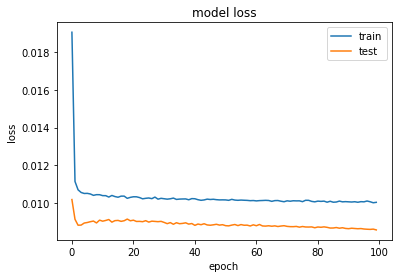

In [155]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
# make a prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 8))


In [138]:
X_test.shape

(8308, 8)

In [157]:
inv_ypred = np.concatenate((y_pred, X_test[:, -7:]), axis=1)
inv_ypred = scaler.inverse_transform(inv_ypred)
inv_ypred = inv_ypred[:,0]
# invert scaling for actual (reshaping y test dimension)
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_ypred))
print('Root Mean Squared error on Test data: %.3f' % rmse)
print('Accuracy:',r2_score(inv_y, inv_ypred))

Root Mean Squared error on Test data: 0.596
Accuracy: 0.5100711333251133


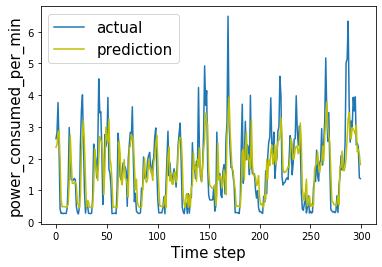

In [161]:
s=[x for x in range(300)]
plt.plot(s, inv_y[:300], label="actual")
plt.plot(s, inv_ypred[:300], 'y', label="prediction")
plt.ylabel('power_consumed_per_min', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

## **CONCLUSION:**

- LSTM works on sequence and time series dataset in a best possible way recent years.So , I used simple LSTM architecture with 100 neurons.
- The dataset is resampled with respect to every hour of the day (we can resample it for any other criteria with respect to our objective) ,which my model trained with 1st year data and predicted the power consumed for the next 3yrs.       
- The resultant graph shows the predictions that my model make with respect to the test data (comparing how my model predicted from actual data)

26280